In [1]:
import numpy as np
import seaborn as sns

from numba import jit
from tqdm import tqdm

## Problematik

Kollege spielt Legends of Runeterra.<br>
Er hat im Spiel 40 Karten, von welchen er immer 1 zufällig zieht.<br>
Er hat 6 Karten, welche er gerne ziehen will.

Nach 20 Zügen hat er aber noch keine von den 6 gewünschten Karten gezogen.<br>
Er wundert sich, ob das überhaupt realistisch ist...<br>
Berechne die Wahrscheinlichkeit, dass er nach 20 Zügen keine der 6 Karten gezogen hat.

## Lösungsverfahren: Monte Carlo Simulation

Monte Carlo without compilation

In [2]:
def slow_carlo(total = 1_000_000):
    count = 0
    for _ in range(total):
        temp = np.random.randint(low = 1, high = 40, size = 20)
        
        if not np.any(temp < 7):
            count += 1

    return np.round(count/total, 5)

In [3]:
%%timeit
slow_carlo(1_000)

10.8 ms ± 52.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Monte Carlo with compilation

In [4]:
@jit
def carlo(total = 1_000_000):
    count = 0
    for _ in range(total):
        temp = np.random.randint(low = 1, high = 40, size = 20)
        
        if not np.any(temp < 7):
            count += 1

    return np.round(count/total, 5)

In [5]:
%%timeit
carlo(1_000)

468 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Calculate probability using 100M simulations

In [6]:
carlo(100_000_000)

0.03542

Looking at distributions of simulations

In [7]:
vals = []
for i in tqdm(range(10_000)):
    vals.append(carlo(10_000))

100%|██████████| 10000/10000 [00:48<00:00, 207.29it/s]


<AxesSubplot:ylabel='Density'>

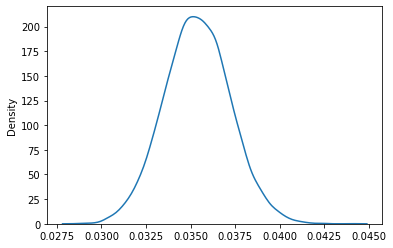

In [8]:
sns.kdeplot(vals)